# Постановка задачи регрессионного анализа

Ставится задача на основе выборочных данных, преставленных в виде вектора $Y=\left(\begin{array}{ccc} y_1  \\  y_2  \\   \vdots \\  y_n \\ \end{array}\right)$, где $y_i$ - наблюдаемое значение результативного признака $Y$ для i-го объекта матрицы $X=\left(\begin{array}{ccc} x_{11} & x_{12} & \vdots & x_{1k} \\  x_{21} & x_{22} & \vdots & x_{2k}  \\   \vdots & \vdots & \vdots & \vdots  \\  x_{n1} & x_{n2} & \vdots & x_{nk} \\ \end{array}\right)$, где $x_{ij}$ - наблюдаемое значение j-го объянсяющего признака для i-го объекта выборочной совокупности, выявить зависимость результативного показателя $Y$ от факторных признаков $X_1,X_2,...,X_K$


### Линейная регрессия
Система линейных уравнений $y_{i}=b_0+b_1x_{i1}+b_2x_{i2}+...+b_kx_{ik}+\varepsilon_i$, где $\varepsilon_i$ - регрессионный остатока, характеризующий расхождение между наблюдаемым значением $y_i$ и осредненным значением $y _{pred_i}=b_0+b_1x_{i1}+b_2x_{i2}+...+b_kx_{ik}$

или

$Y=XB+\varepsilon$, $B=(b_0,...,b_k)$, $\varepsilon=(\varepsilon_1,...,\varepsilon_n)^T$, $X=\left(\begin{array}{ccc} 1 & x_{11} & x_{12} & \vdots & x_{1k} \\ 1 & x_{21} & x_{22} & \vdots & x_{2k}  \\ \vdots &  \vdots & \vdots & \vdots & \vdots  \\ 1 & x_{n1} & x_{n2} & \vdots & x_{nk} \\ \end{array}\right)$

называется линейной моделю регрессии

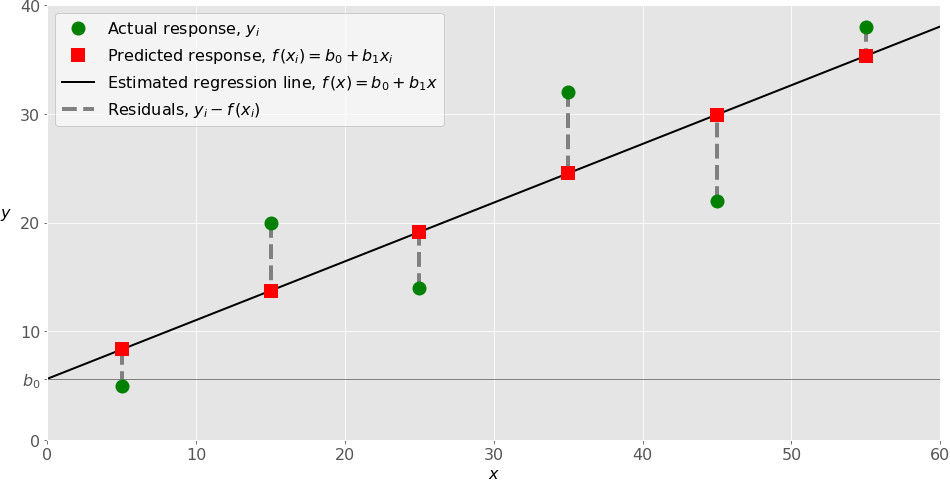

####                                                                 Метод наименьших квадратов

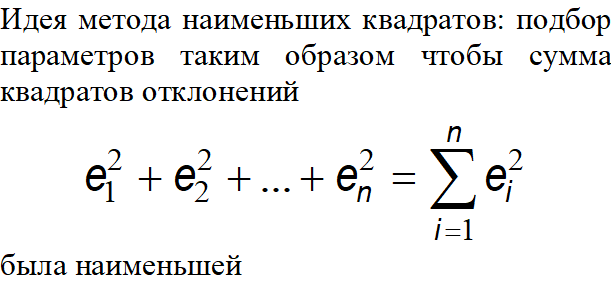

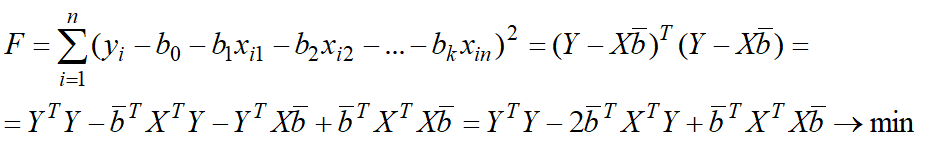

Возьмем частные производные

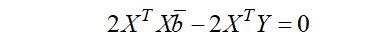

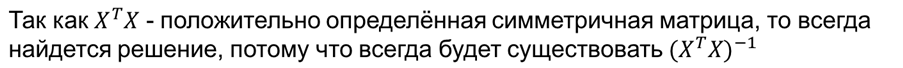

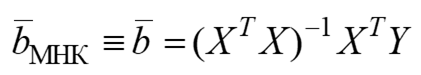

## Проверка гипотезы об адекватности линейной модели выборочным данным 

Исследование свойств оценок классической линейной модели множественной регрессии проводится при дополнительном предположении и нормальном характере распределения регрессионных остатков: $\varepsilon_i$ c $N(0,\sigma)$

$H_0: b_1=b_2=...=b_k=0$



$H_1: \sum |b_i|!=0$

Для проверки гипотезы используется статистика
$Z=\frac { D_{fact}/{k}} { D_{res}/{n-(k+1)}}$

$D_{fact}=(Y_{average}-Y_{pred})^T(Y_{average}-Y_{pred})$


$D_{res}=\sum \varepsilon_i^2$

Если $Z \in F(k,n-k-1)$, то $H_0$ принимается. Критическая область правосторонняя

## Проверка гипотезы о значимости коэффициентов 

$H_0: b_i=0$


$H_1: b_i!=0$

Для проверки гипотез строят статистики $z=\frac{b_j}{S_{b_j}}$, где 

$S_{b_j}=\sqrt{\frac {1}{n-k-1}(Y-Y_{pred})^T(Y-Y_{pred})(X^TX)^{-1}_{jj}}$

Если $z \in t(n-k-1)$, то $H_0$ принимается. Критическая область двусторонняя

## Мультиколлинеарность 

Мультиколлинеарность - наличие линейной зависимости между объясняющими переменными регрессионной модели. При этом различают полную коллинеарность, которая означает наличие функциональной линейной зависимости и частичную  мультиколлинеарность — наличие сильной корреляции между факторами.

Когда между объясняющими переменными существует функциональная зависимость (полная мультиколлинеарность), то матрица объясняющих переменных (матрица Х) вырождена, так как ранг матрицы Х меньше k+1, что в свою очередь, приводит к вырожденности $Х^TX$,а это значит не существует обратная  к этой матрице, и следовательно невозможно оценить коэффициенты методом наименьших квадратов. 

При сильной статистической связи объясняющих переменных матрица $Х^TX$ становится плохо обусловленной - ее определитель близок к кулю. При этом элементы $(Х^TX)^{-1}$ вычисляются с большой погрешностью. Это влечет за собой увеличение дисперсии МНК-оценок, смещенности результатов процедур проверки значимости коэффициентов линейной регрессии, к переобучаемости модели.   

Мультиколлинеарность можно обнаружить по большим коэффициентам детерминации линейных регрессионных моделей: 

$x_i=b_1*x_1 +b_2*x_2+...+b_{i-1}x_{i-1}+b_{i+1}x_{i+1}+...+b_k*x_k+\varepsilon$

## Регуляризация

Однин из способов бороться с негативным эффектом излишнего подстраивания под данные — использование регуляризации, т. е. добавление некоторого штрафа за большие значения коэффициентов у линейной модели. Тем самым запрещаются слишком "резкие" изгибы, и предотвращается переобучение.

Ридж-регрессия или L2-регуляризация

$\sum {\varepsilon_i^2}+\lambda \sum{b_i^2}->min$

$b=(X^TX+\lambda E)^{-1}X^TY$

Лассо-регрессия или L1-регуляризация

$\sum {\varepsilon_i^2}+\lambda \sum{|b_i|}->min$

L1 регуляризация "исключает" незначимые переменные

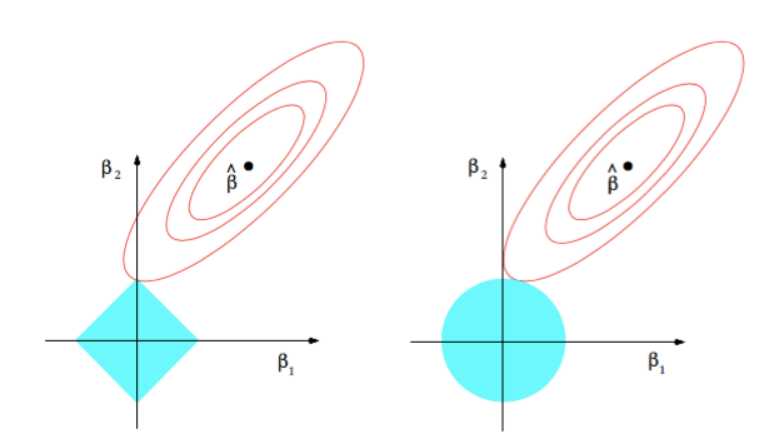

## Пример

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso,Ridge
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score
import scipy.stats as sts
from sklearn.linear_model import LinearRegression

In [2]:
sheet_id = '1Qf5y7hOVwLEVKSRKNG10sdE57QQt5QzPttbK5Mf8Fm0'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv'
df=pd.read_csv(url)
df.head()

,Субъект Российской Федерации,ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ\n(оценка на конец года; тысяч человек),Городское население,Сельское население,СООТНОШЕНИЕ МУЖЧИН И ЖЕНЩИН \n(оценка на конец года; на 1000 мужчин приходится женщин),КОЭФФИЦИЕНТЫ ДЕМОГРАФИЧЕСКОЙ НАГРУЗКИ\n(оценка на конец года; на 1000 человек трудоспособного возраста приходится лиц нетрудоспособных возрастов),ОБЩИЕ КОЭФФИЦИЕНТЫ РОЖДАЕМОСТИ\n(число родившихся на 1000 человек населения),ОБЩИЕ КОЭФФИЦИЕНТЫ СМЕРТНОСТИ\n(число умерших на 1000 человек населения),ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ\n(число лет),ОБЩИЕ КОЭФФИЦИЕНТЫ БРАЧНОСТИ на 1000 человек населения,...,СТОИМОСТЬ ФИКСИРОВАННОГО НАБОРА ПОТРЕБИТЕЛЬСКИХ ТОВАРОВ И УСЛУГ (проценты к среднему по РФ),Зарегистрировано преступлений по ст. 290 УК РФ (получение взятки),Зарегистрировано преступлений по ст. 291 УК РФ (дача взятки),"Зарегистрировано преступлений, связанных с незаконным оборотом наркотиков","Выявлено лиц, совершивших преступления экстремистской направленности",Зарегистрировано преступлений средней тяжести,Зарегистрировано преступлений особой тяжести,"Зарегистрировано преступлений по ч. 4, ст. 111 УК РФ - умышленное причинение тяжкого вреда здоровью, повлекшее по неосторожности смерть потерпевшего","Предварительно расследовано преступлений, совершенных в состоянии алкогольного опьянения",Всего нераскрытых преступлений в отчётном периоде
0,Алтайский край,2317,"56,9","43,1",1166,846,"9,1",14,"71,61","5,8",...,91,60,66,5765,8,15921,3978,148,12120,23391
1,Амурская область,790,"67,7","32,3",1109,744,10,14,"68,66","7,1",...,104,27,96,649,1,973,79,0,174,454
2,Архангельская область,1136,"78,6","21,4",1132,816,9,13,"72,34","6,1",...,109,7,11,529,6,1280,316,13,1131,2188
3,Астраханская область,1006,"66,7","33,3",1122,799,"10,9","11,3","73,86","5,8",...,90,8,8,1438,3,2727,612,27,1768,5261
4,Белгородская область,1549,"67,5","32,5",1163,788,"8,5","13,3","74,21","6,7",...,88,62,21,3190,7,10744,1400,71,9873,13354


In [3]:
df.columns

Index(['Субъект Российской Федерации',
       'ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ\n(оценка на конец года; тысяч человек)',
       'Городское население', 'Сельское население',
       'СООТНОШЕНИЕ МУЖЧИН И ЖЕНЩИН \n(оценка на конец года; на 1000 мужчин приходится женщин)',
       'КОЭФФИЦИЕНТЫ ДЕМОГРАФИЧЕСКОЙ НАГРУЗКИ\n(оценка на конец года; на 1000 человек трудоспособного возраста приходится лиц нетрудоспособных возрастов)',
       'ОБЩИЕ КОЭФФИЦИЕНТЫ РОЖДАЕМОСТИ\n(число родившихся на 1000 человек населения)',
       'ОБЩИЕ КОЭФФИЦИЕНТЫ СМЕРТНОСТИ\n(число умерших на 1000 человек населения)',
       'ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ\n(число лет)',
       'ОБЩИЕ КОЭФФИЦИЕНТЫ БРАЧНОСТИ на 1000 человек населения',
       'ОБЩИЕ КОЭФФИЦИЕНТЫ РАЗВОДИМОСТИ на 1000 человек населения',
       'Численность рабочей силы, \nтыс. человек',
       'ПОТРЕБНОСТЬ В РАБОТНИКАХ, ЗАЯВЛЕННАЯ РАБОТОДАТЕЛЯМИ\nВ ОРГАНЫ СЛУЖБЫ ЗАНЯТОСТИ НАСЕЛЕНИЯ1)\n(на конец года; человек)',
       'СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХ

In [4]:
features=['МОЩНОСТЬ АМБУЛАТОРНО-ПОЛИКЛИНИЧЕСКИХ ОРГАНИЗАЦИЙ Всего, тыс. посещений в смену\n(на конец года)',
      'численность населения с денежными доходами ниже величины прожиточного минимума - тыс. человек',
      'Зарегистрировано преступлений средней тяжести',
      ' УРОВЕНЬ ЗАНЯТОСТИ НАСЕЛЕНИЯ В ТРУДОСПОСОБНОМ ВОЗРАСТЕ (по данным выборочных обследований рабочей силы; в процентах)',
      'СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ\n(в месяц; рублей)',
      'ОБЩИЕ КОЭФФИЦИЕНТЫ РАЗВОДИМОСТИ на 1000 человек населения',
      'ИНВЕСТИЦИИ В ОСНОВНОЙ КАПИТАЛ\n(в фактически действовавших ценах; миллионов рублей)',
      'ЗАДОЛЖЕННОСТЬ ПО КРЕДИТАМ В РУБЛЯХ, ПРЕДОСТАВЛЕННЫМ КРЕДИТНЫМИ ОРГАНИЗАЦИЯМИ ЮРИДИЧЕСКИМ ЛИЦАМ (миллионов рублей)',
     ]
y=df['ОБЩИЕ КОЭФФИЦИЕНТЫ СМЕРТНОСТИ\n(число умерших на 1000 человек населения)']
X=df[features]

In [5]:
X.dtypes

МОЩНОСТЬ АМБУЛАТОРНО-ПОЛИКЛИНИЧЕСКИХ ОРГАНИЗАЦИЙ Всего, тыс. посещений в смену\n(на конец года)                         object
численность населения с денежными доходами ниже величины прожиточного минимума - тыс. человек                           object
Зарегистрировано преступлений средней тяжести                                                                            int64
 УРОВЕНЬ ЗАНЯТОСТИ НАСЕЛЕНИЯ В ТРУДОСПОСОБНОМ ВОЗРАСТЕ (по данным выборочных обследований рабочей силы; в процентах)    object
СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ\n(в месяц; рублей)                                                               int64
ОБЩИЕ КОЭФФИЦИЕНТЫ РАЗВОДИМОСТИ на 1000 человек населения                                                               object
ИНВЕСТИЦИИ В ОСНОВНОЙ КАПИТАЛ\n(в фактически действовавших ценах; миллионов рублей)                                      int64
ЗАДОЛЖЕННОСТЬ ПО КРЕДИТАМ В РУБЛЯХ, ПРЕДОСТАВЛЕННЫМ КРЕДИТНЫМИ ОРГАНИЗАЦИЯМИ ЮРИДИЧЕСКИМ ЛИЦАМ (миллионов рубле

In [6]:
y=y.apply(lambda x: x.replace(',','.') if type(x)!=type(1) else x)
y=y.astype(np.float64)
for i in features:
    X[i]=X[i].apply(lambda x: x.replace(',','.') if type(x)!=type(1) else x)
    X[i]=X[i].astype(np.float64)

In [7]:
X.columns=['x'+str(i) for i in range(len(features))]

## Построение модели "вручную"

#### Коэффициенты модели 

In [8]:
X['ones']=[1]*85
coefs=np.linalg.inv(X.T@X)@X.T@y
coefs

0    3.644225e-03
1   -8.258517e-04
2    1.604404e-06
3    2.197148e-01
4   -1.280092e-04
5    1.419686e+00
6   -3.925759e-06
7    9.928778e-07
8   -5.673247e+00
dtype: float64

#### Предсказания

In [9]:
Y=sum([X.iloc[:,i]*coefs[i] for i in range(8)])+coefs[8]
Y,y

(0     14.007234
 1     13.577874
 2     11.625687
 3     13.188789
 4     13.470335
         ...    
 80     5.124326
 81    12.877909
 82     9.161946
 83     6.618886
 84    13.931363
 Length: 85, dtype: float64,
 0     14.0
 1     14.0
 2     13.0
 3     11.3
 4     13.3
       ... 
 80     4.3
 81    12.4
 82     9.1
 83     4.7
 84    14.7
 Name: ОБЩИЕ КОЭФФИЦИЕНТЫ СМЕРТНОСТИ\n(число умерших на 1000 человек населения), Length: 85, dtype: float64)

#### Расчет t-статистик

$S_{b_j}=\sqrt{\frac {1}{n-k-1}(Y-Y_{pred})^T(Y-Y_{pred})(X^TX)^{-1}_{jj}}$

In [10]:
S=[((1/(len(Y)-9)*(y-Y).T@(y-Y))**0.5*(np.linalg.inv(X.T@X)[j,j])**0.5) for j in range(9)]
S

[0.013209994810794514,
 0.0027591458452586605,
 2.3005758980915982e-05,
 0.04267123557115582,
 1.6971273801674832e-05,
 0.2630063468936595,
 8.34253407831814e-07,
 4.045908872601068e-07,
 2.74134594730833]

In [11]:
t=coefs/S

In [12]:
t

0    0.275869
1   -0.299314
2    0.069739
3    5.149014
4   -7.542698
5    5.397917
6   -4.705715
7    2.454029
8   -2.069511
dtype: float64

##### p-value

In [35]:
[2*min(sts.t(85-9).cdf(i),1-sts.t(85-9).cdf(i)) for i in t]

[0.783397619439987,
 0.7655172883326664,
 0.9445843928716933,
 1.997350277171961e-06,
 8.224343412521532e-11,
 7.40260833520523e-07,
 1.112105494349285e-05,
 0.016415655061177592,
 0.04189714348401968]

#### F-статистика

Для проверки гипотезы используется статистика
$Z=\frac { D_{fact}/{k}} { D_{res}/{(n-(k+1))}}$

In [14]:
Z=((Y-y.mean()).T@(Y-y.mean())/8)/((y-Y).T@(y-Y)/(85-9))
Z

24.34925151058318

In [15]:
sts.f(8,76).ppf(0.95)

2.062738920780216

##### p-value

In [16]:
1-sts.f(8,76).cdf(Z)

1.1102230246251565e-16

### statsmodels

In [17]:
import statsmodels.api as sm
import scipy.stats as sts

#X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                                       OLS Regression Results                                                      
Dep. Variable:     ОБЩИЕ КОЭФФИЦИЕНТЫ СМЕРТНОСТИ
(число умерших на 1000 человек населения)   R-squared:                       0.719
Model:                                                                                 OLS   Adj. R-squared:                  0.690
Method:                                                                      Least Squares   F-statistic:                     24.35
Date:                                                                     Thu, 14 Oct 2021   Prob (F-statistic):           4.39e-18
Time:                                                                             17:57:05   Log-Likelihood:                -154.17
No. Observations:                                                                       85   AIC:                             326.3
Df Residuals:                                                               

In [18]:
est2.fvalue

24.349251510582054

In [19]:
est2.f_pvalue

4.388242304863183e-18

### sklearn

In [20]:
X=X.drop('ones',axis=1)
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [21]:
reg.coef_,reg.intercept_

(array([ 3.64422465e-03, -8.25851674e-04,  1.60440388e-06,  2.19714790e-01,
        -1.28009190e-04,  1.41968649e+00, -3.92575910e-06,  9.92877761e-07]),
 -5.673246749865685)

In [22]:
reg.score(X,y)

0.7193438680016283

### Обнаружение мультиколлинеарности

$VIF=\frac {1}{1-R^2}$

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(X):
    return pd.Series([variance_inflation_factor(X.values, i) 
                      for i in range(X.shape[1])], index=X.columns).sort_values(ascending=False).to_frame()
compute_vif(X)

,0
x3,48.304126
x5,42.190158
x0,23.651710
x1,14.689092
x4,12.266017
x7,7.097042
x6,5.276772
x2,2.047193


In [24]:
compute_vif(X.drop('x3',axis=1))

,0
x0,23.216801
x5,13.297631
x1,12.444738
x4,11.310022
x7,6.958698
x6,4.977003
x2,2.045096


In [25]:
compute_vif(X.drop(['x0','x3'],axis=1))

,0
x5,12.986460
x4,11.268357
x6,4.866867
x1,4.338351
x7,3.148127
x2,2.044915


In [26]:
compute_vif(X.drop(['x0','x3','x5'],axis=1))

,0
x6,4.631322
x4,3.154069
x7,2.986216
x1,2.983501
x2,2.016521


In [27]:
lr=LinearRegression()
lr.fit(X.drop(['x0','x3','x5'],axis=1),y)
r2_score(y,lr.predict(X.drop(['x0','x3','x5'],axis=1)))

0.16275628524264252

### Полиномы

In [28]:
pipe=Pipeline([('poly',PolynomialFeatures(degree=2)),
                ('regression',LinearRegression())])
pipe.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [29]:
r2_score(y,pipe.predict(X))

0.8931150360263762

In [30]:
r2_score(y,reg.predict(X))

0.7193438680016283

### Регуляризация

In [31]:
pipe2=Pipeline([('poly',PolynomialFeatures(degree=2)),
               ('Ridge',Ridge()),
              ])
pipe2.fit(X,y)
r2_score(y,pipe2.predict(X))

0.8917104501767833

In [32]:
pipe3=Pipeline([('poly',PolynomialFeatures(degree=2)),
               ('Lasso',Lasso()),
              ])
pipe3.fit(X,y)
r2_score(y,pipe3.predict(X))

0.8128212416869333

In [33]:
pipe=Pipeline([('poly',PolynomialFeatures(degree=2)),
                ('regression',LinearRegression())])
pipe.fit(X.iloc[:,4:],y)
r2_score(y,pipe.predict(X.iloc[:,4:]))

0.7585682585061646